<a href="https://colab.research.google.com/github/Jagannath8/GoeduHub-Training/blob/main/Assignment_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GO_STP_579 -> Jagannath Pal**

# ***Assignment_16***


---


Naive Bayes classifiers are built on Bayesian classification methods. These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities.


Create a Model using Naive Bayes classifiers to predict whether a passenger on the titanic would have been survived or not.

Dataset can be downloaded from Kaggle.

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Reading the Data

In [ ]:
df = pd.read_csv('/content/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Understanding the Data

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df.shape

(891, 12)

In [ ]:
df.size

10692

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
df.isnull().any

<bound method DataFrame.any of      PassengerId  Survived  Pclass   Name  ...  Ticket   Fare  Cabin  Embarked
0          False     False   False  False  ...   False  False   True     False
1          False     False   False  False  ...   False  False  False     False
2          False     False   False  False  ...   False  False   True     False
3          False     False   False  False  ...   False  False  False     False
4          False     False   False  False  ...   False  False   True     False
..           ...       ...     ...    ...  ...     ...    ...    ...       ...
886        False     False   False  False  ...   False  False   True     False
887        False     False   False  False  ...   False  False  False     False
888        False     False   False  False  ...   False  False   True     False
889        False     False   False  False  ...   False  False  False     False
890        False     False   False  False  ...   False  False   True     False

[891 rows x 12 colum

# Visualization

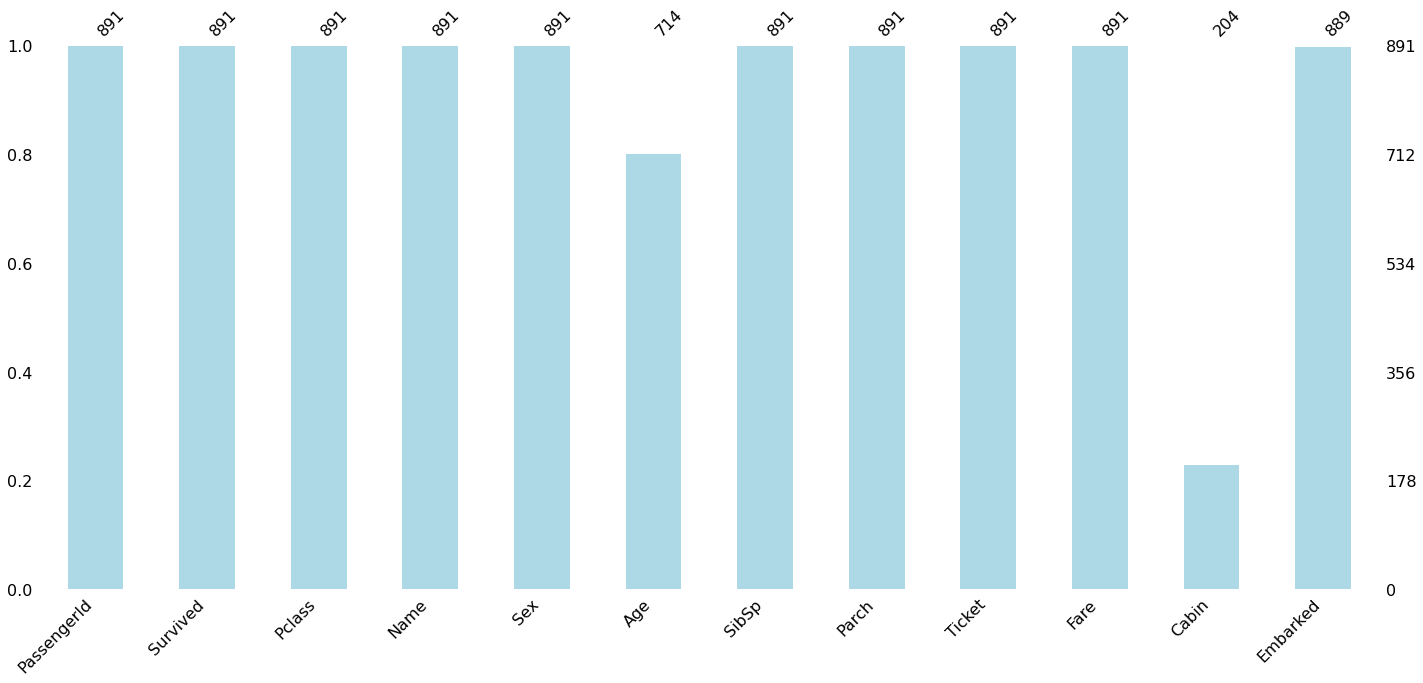

In [ ]:
import missingno as no
no.bar(df, color='Lightblue')

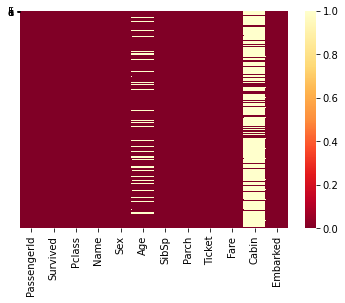

In [ ]:
sns.heatmap(df.isnull(), yticklabels='False', cmap='YlOrRd_r')

# Handling Missing Values

In [ ]:
df['Age'].fillna(df.Age.median(), inplace=True)
df.Age.isna().any()

False

In [ ]:
np.random.seed(42)
df['Cabin'].fillna(np.random.choice(df.Cabin.unique()), inplace=True)
df['Cabin'].isna().any()

False

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

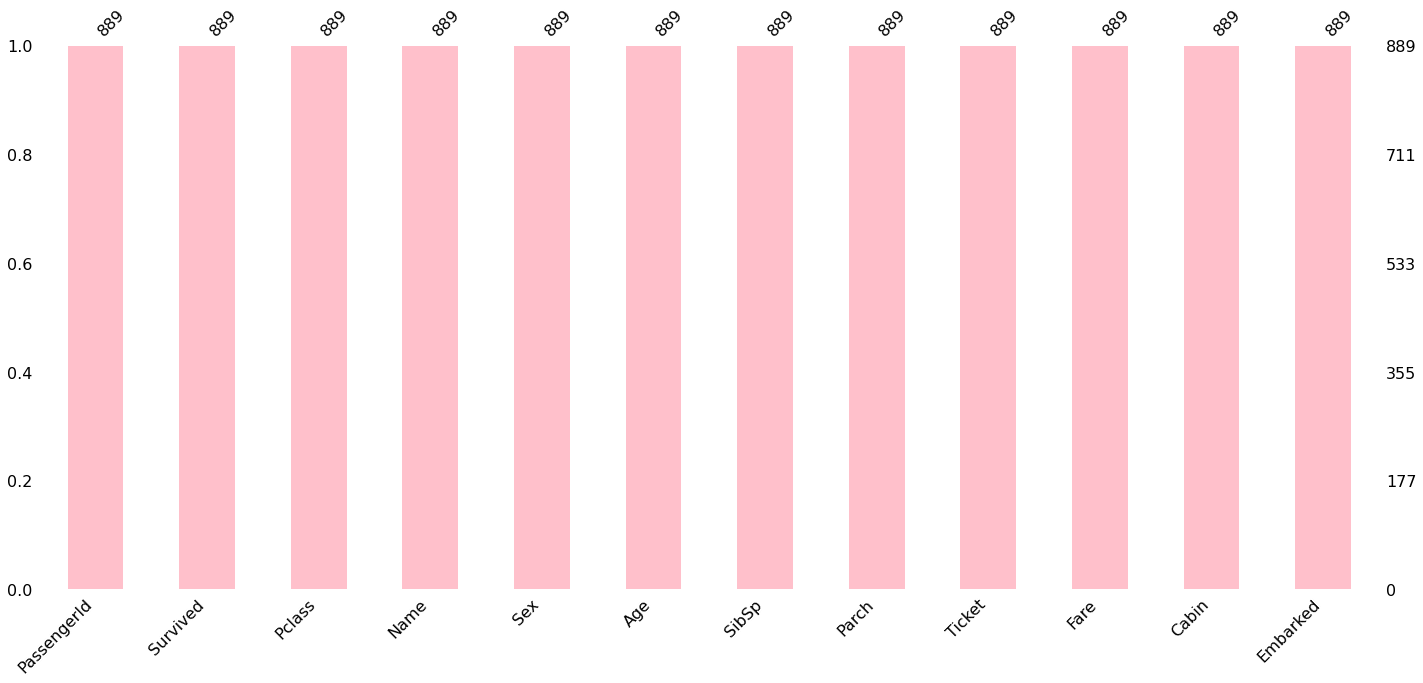

In [ ]:
import missingno as no
no.bar(df, color='pink')

In [ ]:
df.Survived.value_counts()

0    549
1    340
Name: Survived, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


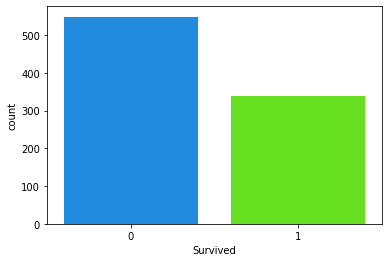

In [ ]:
sns.countplot(df.Survived, palette='gist_rainbow_r')
plt.show()

In [ ]:
df.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

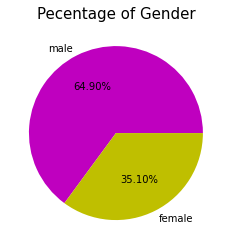

In [ ]:
df1 = df['Sex'].value_counts()
plt.pie(df1.values, labels=df1.index, autopct='%0.2f%%', colors='my')
plt.title('Pecentage of Gender', fontsize=15)
plt.show()

In [ ]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

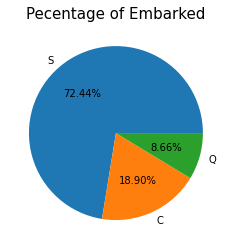

In [ ]:
df1 = df['Embarked'].value_counts()
plt.pie(df1.values, labels=df1.index, autopct='%0.2f%%')
plt.title('Pecentage of Embarked', fontsize=15)
plt.show()

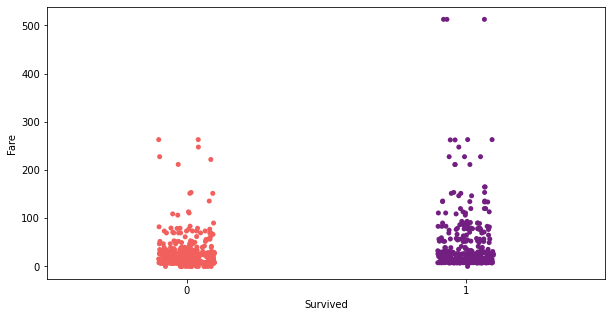

In [ ]:
plt.figure(figsize=(10,5))
sns.stripplot(x=df['Survived'], y=df.Fare, palette='magma_r')
plt.show()

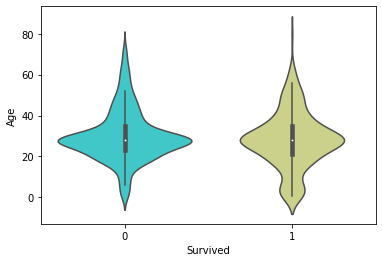

In [ ]:
sns.violinplot(x=df.Survived, y=df.Age, palette='rainbow')

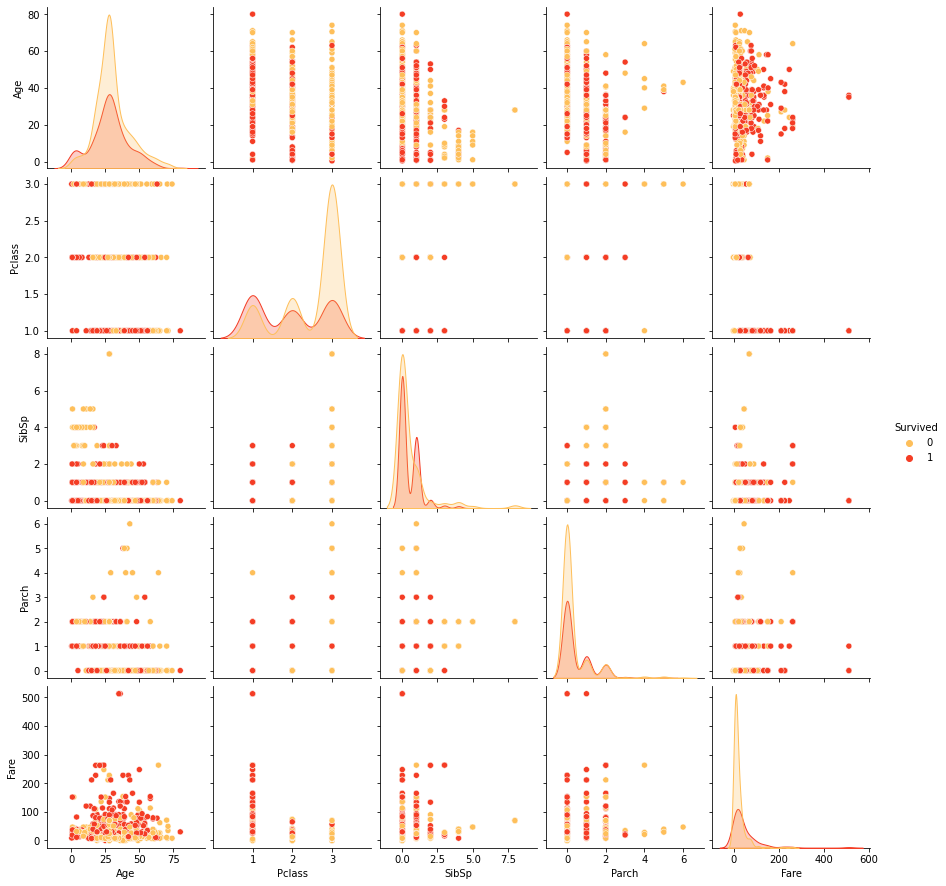

In [ ]:
sns.pairplot(df,hue='Survived',vars=['Age', 'Pclass', 'SibSp',	'Parch', 'Fare' ],palette='YlOrRd')

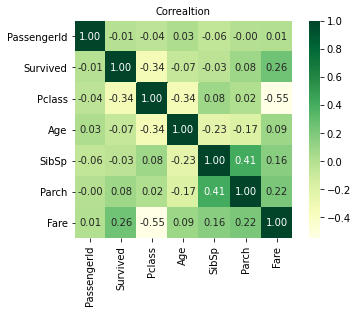

In [ ]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', square=True, cmap="YlGn")
plt.title("Correaltion", size=10)
plt.show()

# Splitting the Data into Dependent and Indpendent variables

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Sex = le.fit_transform(df.Sex)
df.Sex.unique()

array([1, 0])

In [ ]:
x = df.drop(['PassengerId',	'Survived',	'Ticket',	'Name', 'Cabin','Embarked'], axis='columns')
y = df['Survived']

In [ ]:
x[:5]

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [ ]:
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Training and Testing the Data

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=20)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

# Prediction

In [ ]:
ypred = gnb.predict(xtest)
ypred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1])

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
cm = confusion_matrix(ytest, ypred)
cm

array([[117,  21],
       [ 20,  65]])

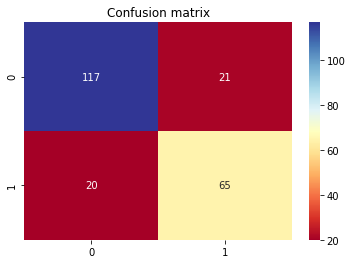

In [ ]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="RdYlBu" ,fmt='g')
plt.title('Confusion matrix', y=5.1)
plt.show()

# Accuracy Score

In [ ]:
ac = accuracy_score(ytest, ypred)
print("Accuracy score =", ac)

Accuracy score = 0.8161434977578476




---

